In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

%matplotlib inline
sns.set(style='white')
colors = [['dimgray', 'forestgreen', 'red', 'navy', 'royalblue', 'maroon'],
          ['dimgray', 'forestgreen', 'red', 'maroon', 'royalblue', 'navy', 'purple'],
          ['forestgreen', 'red', 'royalblue']]

np.random.seed(0)

In [2]:
# Loading the data

dataset_3 = pd.read_csv('data/cluster_ds3.csv',
                  header=0,
                  index_col=None)

dataset_4 = pd.read_csv('data/cluster_ds4.csv',
                  header=0,
                  index_col=None)

dataset_5 = pd.read_csv('data/cluster_ds5.csv',
                  header=0,
                  index_col=None)

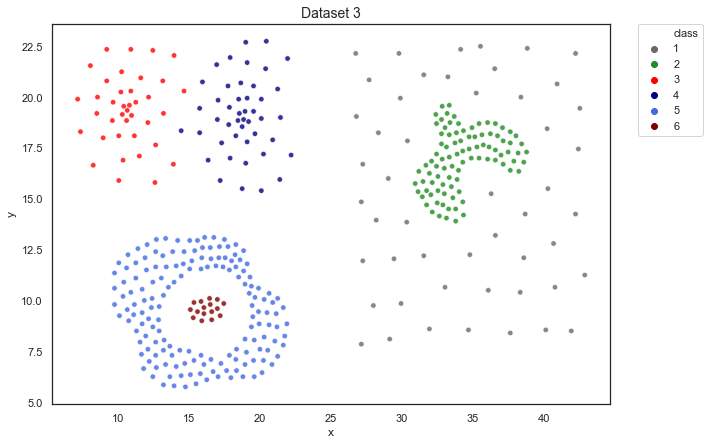

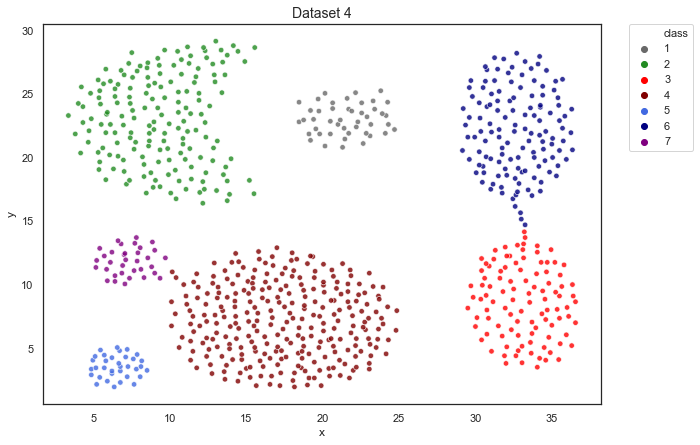

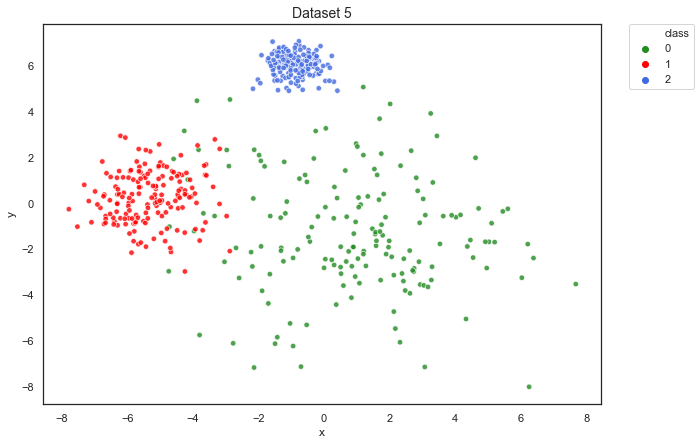

In [3]:
# Original clusters

fig = plt.figure(figsize=[10, 7])
s = sns.scatterplot(data=dataset_3,
                    x='x',
                    y='y',
                    hue='class',
                    s=30, alpha=0.8,
                    legend='full',
                    palette=colors[0])
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
t = plt.title('Dataset 3', fontsize=14)
plt.show()
plt.close()

fig = plt.figure(figsize=[10, 7])
s = sns.scatterplot(data=dataset_4,
                    x='x',
                    y='y',
                    hue='class',
                    s=30, alpha=0.8,
                    legend='full',
                    palette=colors[1])
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
t = plt.title('Dataset 4', fontsize=14)
plt.show()
plt.close()

fig = plt.figure(figsize=[10, 7])
s = sns.scatterplot(data=dataset_5,
                    x='x',
                    y='y',
                    hue='class',
                    s=30, alpha=0.8,
                    legend='full',
                    palette=colors[2])
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
t = plt.title('Dataset 5', fontsize=14)
plt.show()
plt.close()

In [4]:
# Data Analysis

print('=> Dataset 3\n')
dataset_3.info()
print('\n=> Dataset 4\n')
dataset_4.info()
print('\n=> Dataset 5\n')
dataset_5.info()

=> Dataset 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 3 columns):
x        399 non-null float64
y        399 non-null float64
class    399 non-null int64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB

=> Dataset 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 3 columns):
x        788 non-null float64
y        788 non-null float64
class    788 non-null int64
dtypes: float64(2), int64(1)
memory usage: 18.6 KB

=> Dataset 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
x        500 non-null float64
y        500 non-null float64
class    500 non-null int64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [5]:
print('\n=> Dataset 3')
dataset_3.describe()
print('\n=> Dataset 4')
dataset_4.describe()
print('\n=> Dataset 5')
dataset_5.describe()


=> Dataset 3


,x,y,class
count,399.000000,399.000000,399.000000
mean,22.215038,13.970677,3.543860
std,9.736752,4.743516,1.581125
min,7.150000,5.750000,1.000000
25%,14.100000,9.775000,2.000000
50%,18.950000,14.150000,4.000000
75%,32.725000,18.125000,5.000000
max,42.900000,22.750000,6.000000



=> Dataset 4


,x,y,class
count,788.000000,788.000000,788.000000
mean,19.566815,14.171764,3.770305
std,9.922042,8.089683,1.596305
min,3.350000,1.950000,1.000000
25%,11.150000,7.037500,2.000000
50%,18.225000,11.725000,4.000000
75%,30.700000,21.962500,5.000000
max,36.550000,29.150000,7.000000



=> Dataset 5


,x,y,class
count,500.000000,500.000000,500.000000
mean,-1.762312,1.651048,0.998000
std,3.076568,3.566898,0.816903
min,-7.779000,-8.029000,0.000000
25%,-4.657750,-0.872750,0.000000
50%,-1.232000,0.942500,1.000000
75%,-0.174500,5.706500,2.000000
max,7.674000,7.083000,2.000000


In [6]:
# Data preprocessing

def feature_matrix(df):
    return df[['x', 'y']].to_numpy()

In [7]:
def plot_cluster(df, k, algorithm):
    
    fig = plt.figure(figsize=[14, 5])
    
    sp1 = fig.add_subplot(121)
    sc1 = sns.scatterplot(data=df,
                          x='x',
                          y='y',
                          hue='class',
                          s=30, alpha=0.8,
                          legend='full',
                          palette=sns.color_palette(n_colors=k))
    l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    sp2 = fig.add_subplot(122)
    sc2 = sns.scatterplot(data=df,
                    x='x',
                    y='y',
                    hue=algorithm,
                    s=30, alpha=0.8,
                    legend='full',
                    palette=sns.color_palette(n_colors=k))
    l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    sp1.title.set_text('Original clusters')
    sp2.title.set_text('Predicted clusters')
    
    t = plt.suptitle(algorithm, fontsize=20)
    plt.tight_layout()
    t.set_y(0.95)
    plt.subplots_adjust(top=0.85)
    plt.show()
    plt.close()

In [8]:
# Basic Clustering Algorithms

def cluster(df, k):
    kmeans = KMeans(n_clusters=k, n_init=50).fit(feature_matrix(df))
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    df['kmeans'] = labels
    plot_cluster(df, k, 'kmeans')
    
    aggcluster = AgglomerativeClustering(n_clusters=k).fit(feature_matrix(df))
    labels = aggcluster.labels_
    df['agg'] = labels
    plot_cluster(df, k, 'agg')
    
    # Computing hyperparameters for DBSCAN
    
    # Add code here to compute the values for eps and min_samples for the next line
    
    db = DBSCAN(eps=1, min_samples=10).fit(feature_matrix(df))
    labels = db.labels_
    df['dbscan'] = labels
    c = sns.color_palette('cubehelix', n_colors=len(set(labels)))

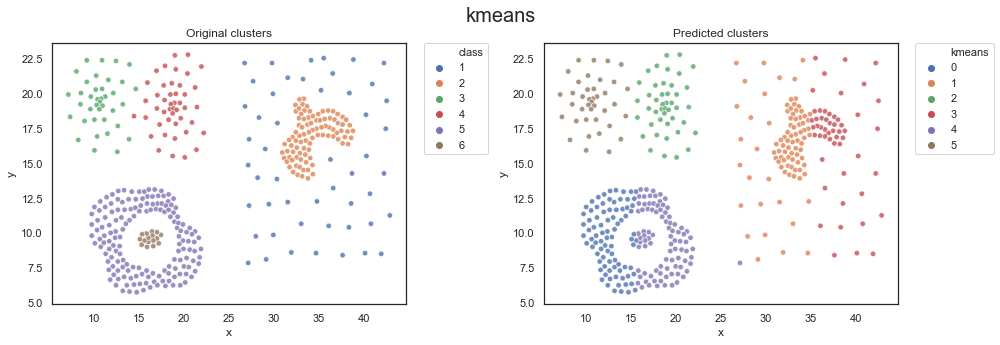

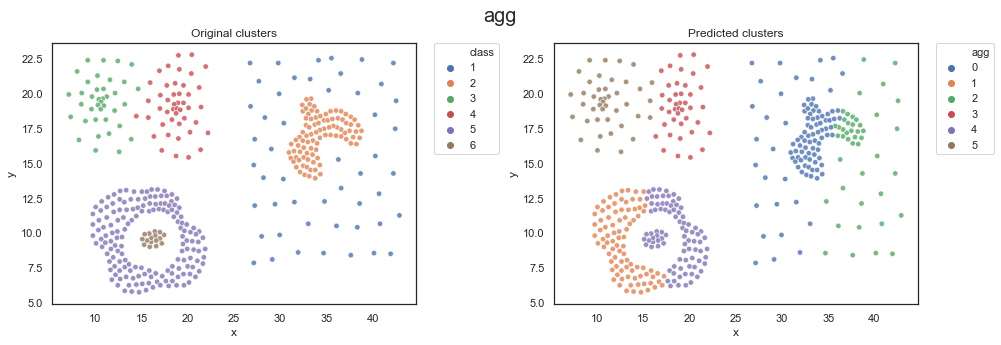

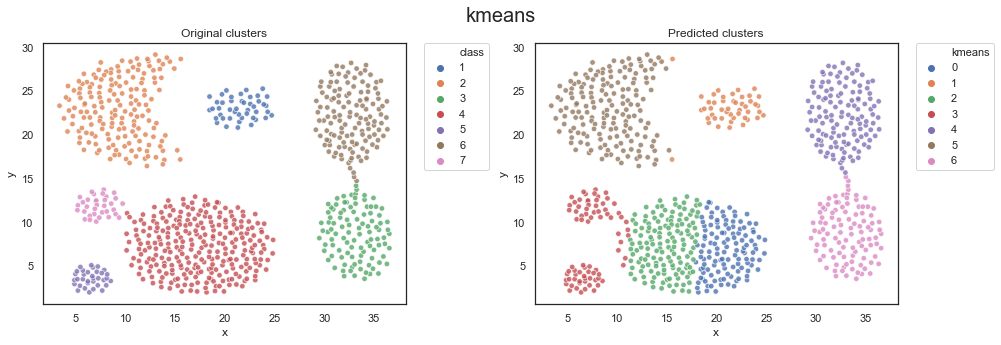

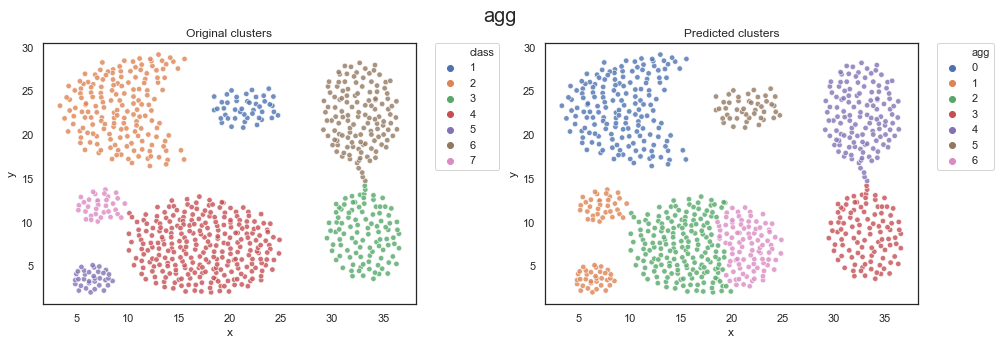

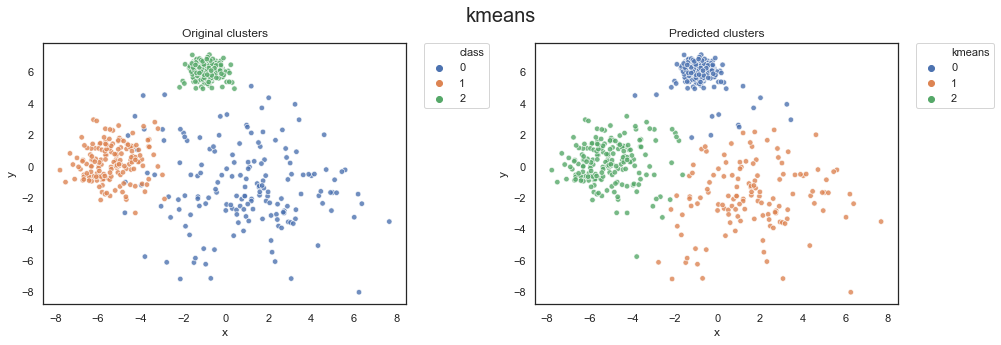

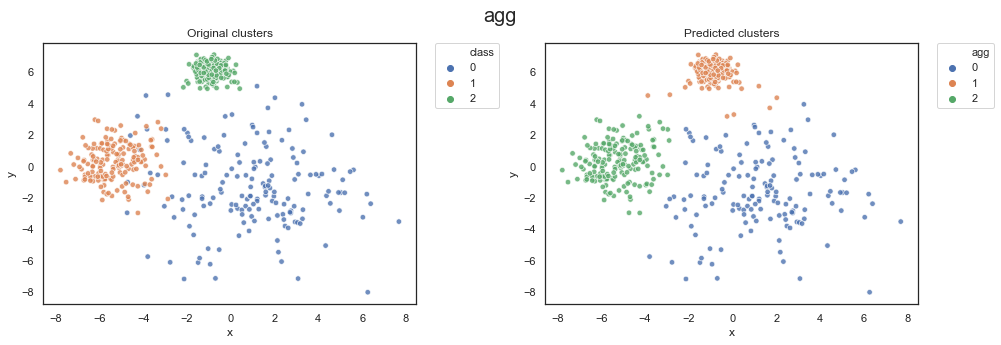

In [9]:
cluster(dataset_3, 6)
cluster(dataset_4, 7)
cluster(dataset_5, 3)